In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Mus_Rec = pd.read_csv('Music Recommendation.csv')

## EDA

### The imported dataset contains information about certain songs and whether they were liked or not. The 'liked' attribute will be our target attribute i.e. what we will be predicting.

In [4]:
Mus_Rec.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
5,0.778,0.6320,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.8270,140.951,224029,4,1
6,0.666,0.5890,0,-8.405,0,0.3240,0.5550,0.000000,0.1140,0.7760,74.974,146053,4,1
7,0.922,0.7120,7,-6.024,1,0.1710,0.0779,0.000040,0.1750,0.9040,104.964,161800,4,1
8,0.794,0.6590,7,-7.063,0,0.0498,0.1430,0.002240,0.0944,0.3080,112.019,247460,4,0
9,0.853,0.6680,3,-6.995,1,0.4470,0.2630,0.000000,0.1040,0.7450,157.995,165363,4,1


In [5]:
Mus_Rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [6]:
Mus_Rec.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


In [7]:
Mus_Rec.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [8]:
print(Mus_Rec.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')


In [9]:
Mus_Rec['liked'].nunique()

2

### Since the 'liked' attribute only contains binary values, we will be using logistic regression as the prediction model

<Figure size 1080x720 with 0 Axes>

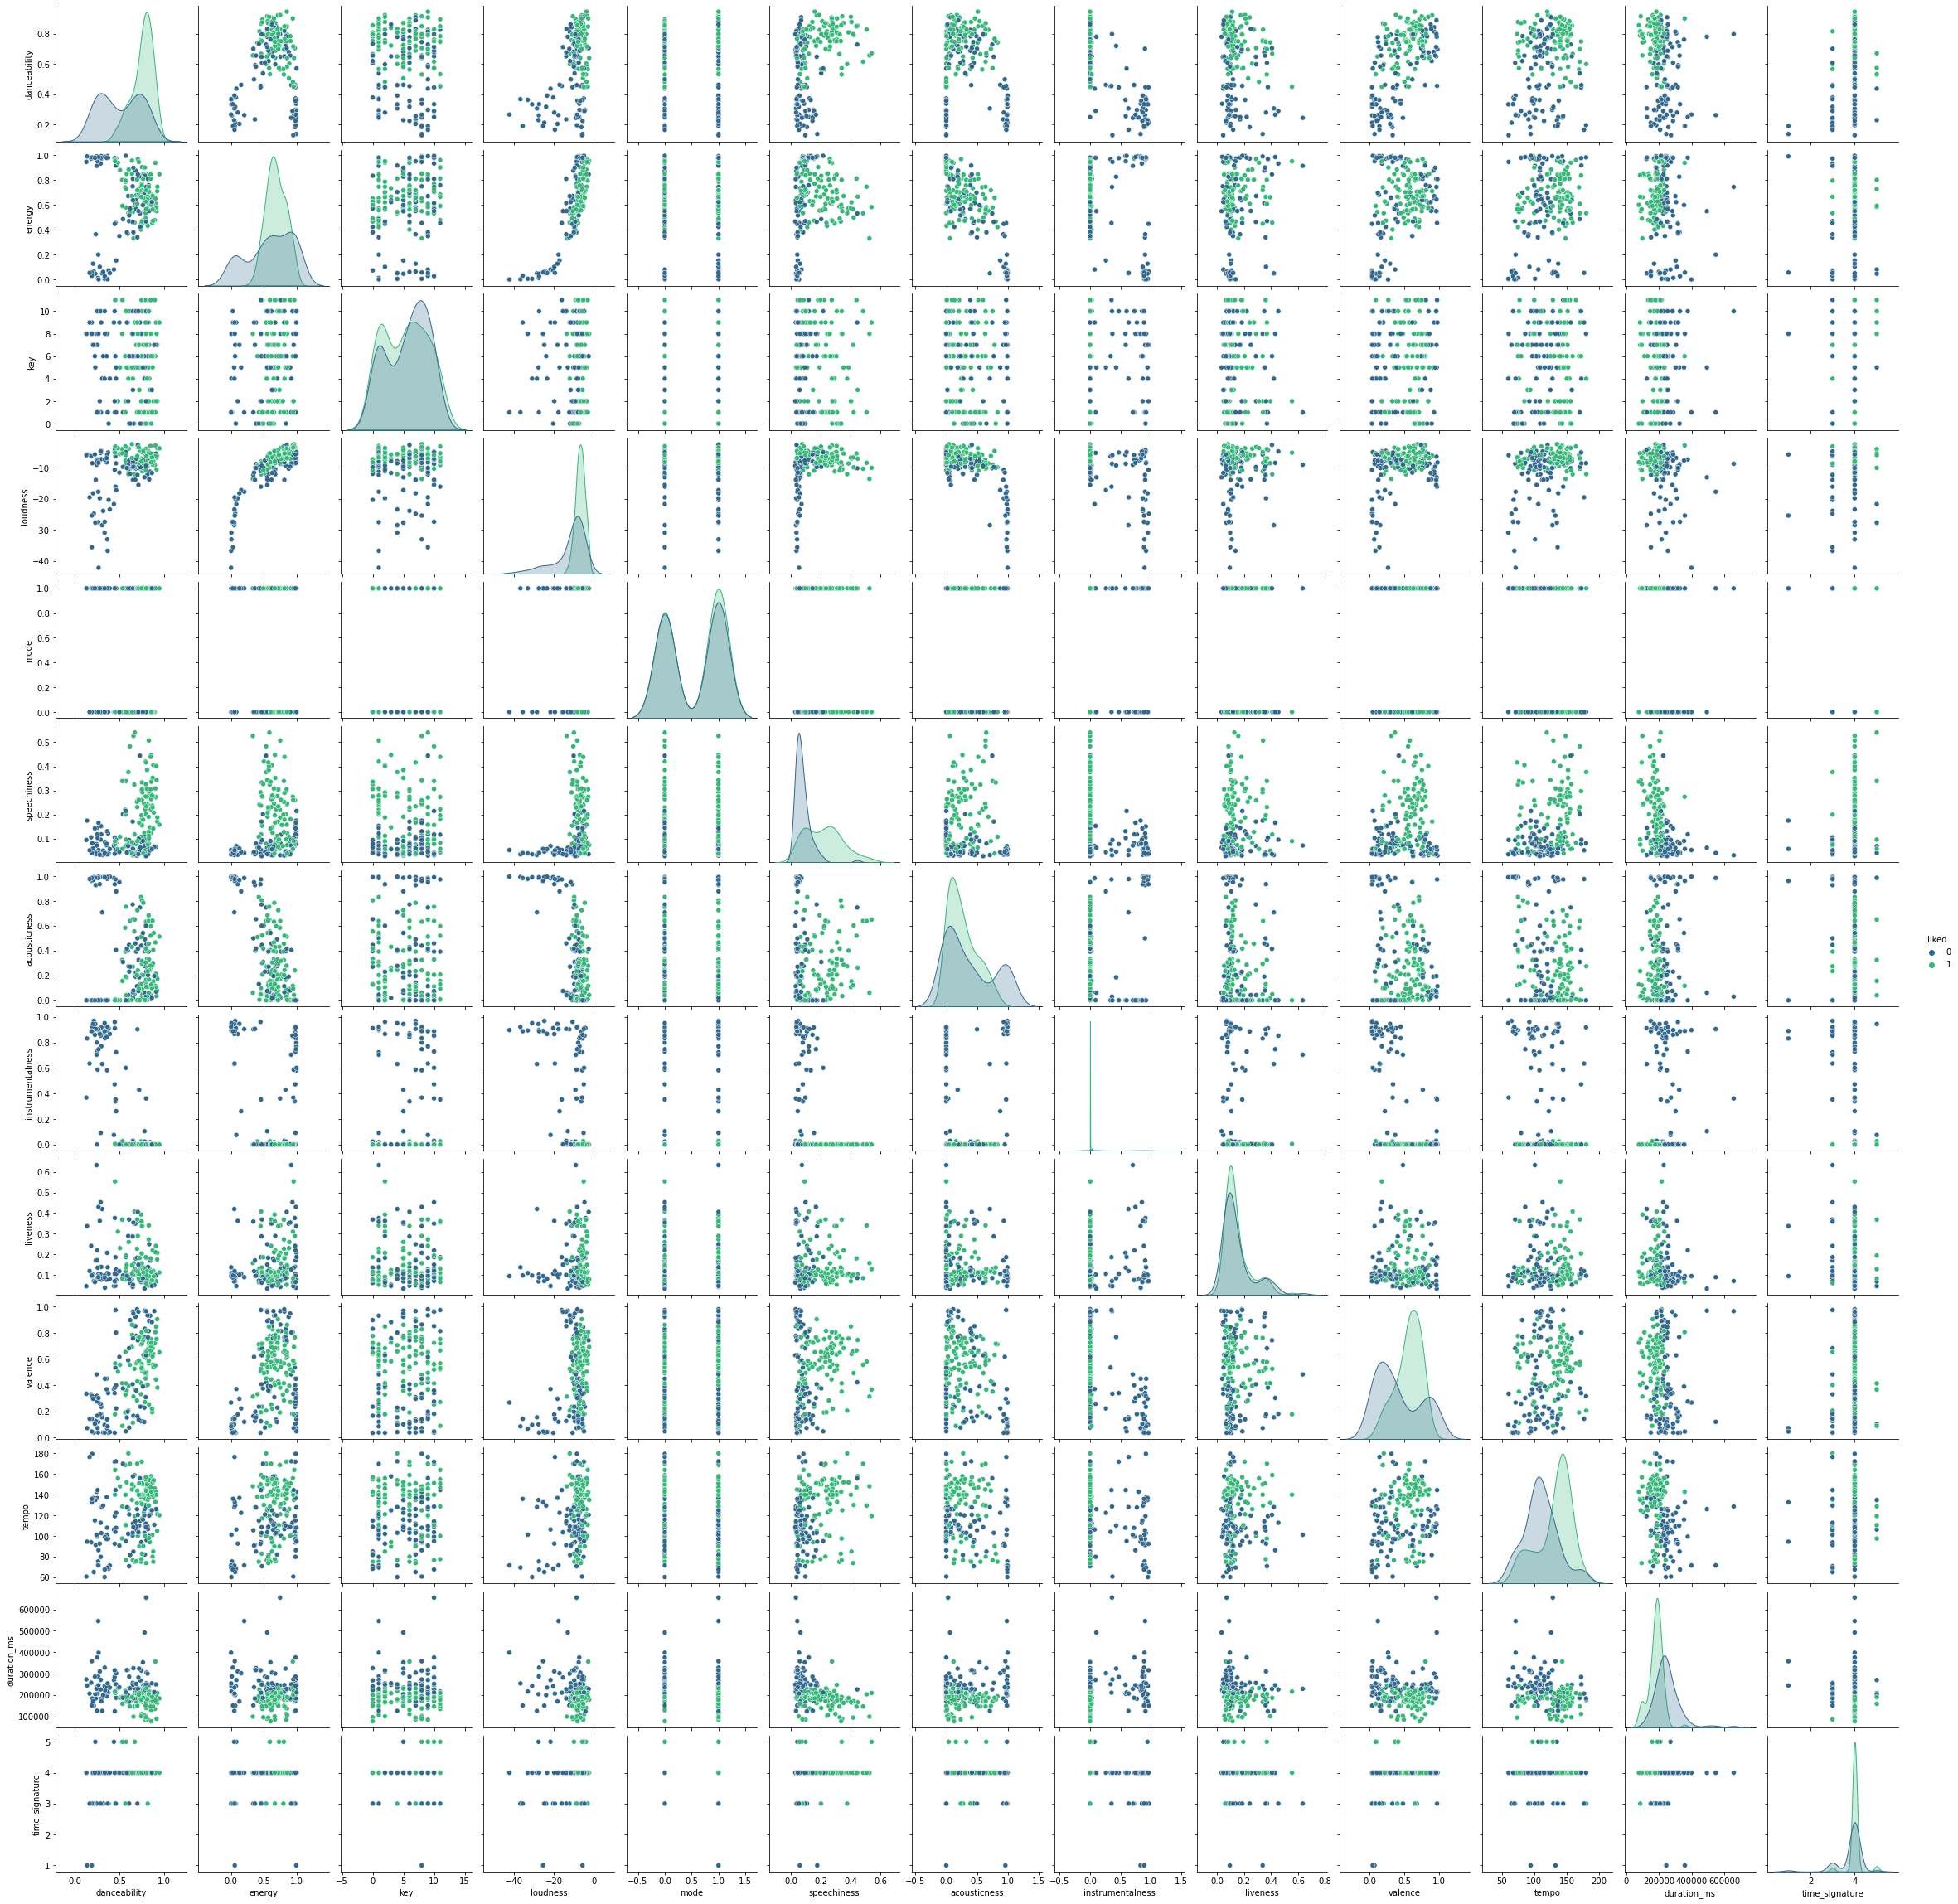

In [10]:
Figure = plt.figure(figsize=(15, 10))

sns.pairplot(data = Mus_Rec, hue = 'liked', palette = 'viridis')

In [11]:
Mus_Rec.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


### From this correlation matrix, we can tell see that there are a few attributes that have very low correlation with 'liked' and other attributes that have a usable correlation with it

#### > key, mode and liveness in general have very low correlation with anything and hence will be dropped
#### > time_signature has low correlation with liked and has low correlation with other attributes
#### > energy, acousticness, tempo has low correlation with liked, but is correlated to another attribute that has relatively significant correlation with liked
#### > danceability, duration_ms, tempo, speechieness, instrumentalness and loudnesshas relatively high correlation with liked

In [12]:
# Dropping key, mode and liveness from the dataset
new_MusRec = Mus_Rec.drop(['key','mode','liveness'], axis=1)

In [13]:
new_MusRec

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,-6.764,0.0477,0.4510,0.000734,0.6280,95.968,304524,4,0
1,0.762,0.7030,-7.951,0.3060,0.2060,0.000000,0.5190,151.329,247178,4,1
2,0.261,0.0149,-27.528,0.0419,0.9920,0.897000,0.0382,75.296,286987,4,0
3,0.722,0.7360,-6.994,0.0585,0.4310,0.000001,0.5820,89.860,208920,4,1
4,0.787,0.5720,-7.516,0.2220,0.1450,0.000000,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,-19.494,0.0520,0.9760,0.635000,0.1430,176.616,206520,3,0
191,0.862,0.6240,-11.630,0.0565,0.0192,0.000153,0.8820,124.896,254240,4,0
192,0.499,0.3510,-11.509,0.0448,0.9510,0.000099,0.6160,90.664,235947,4,0
193,0.574,0.7290,-5.838,0.0965,0.0406,0.000004,0.4130,110.547,190239,5,1


<AxesSubplot:xlabel='time_signature', ylabel='danceability'>

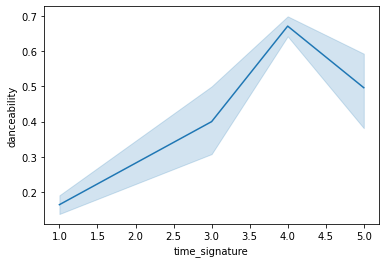

In [15]:
sns.lineplot(x = 'time_signature', y = 'danceability', data = new_MusRec)

#### From this graph we can tell that there is a certain amount of correlation between time_signature and danceability. Since danceability has relatively high correlation with liked and hence we will be including this attribute in the model.

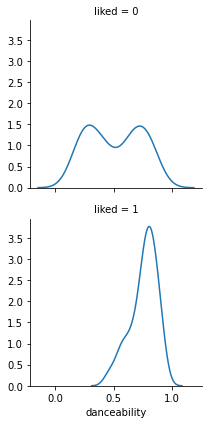

In [18]:
g = sns.FacetGrid(new_MusRec, row = 'liked')
g.map(sns.kdeplot, "danceability")

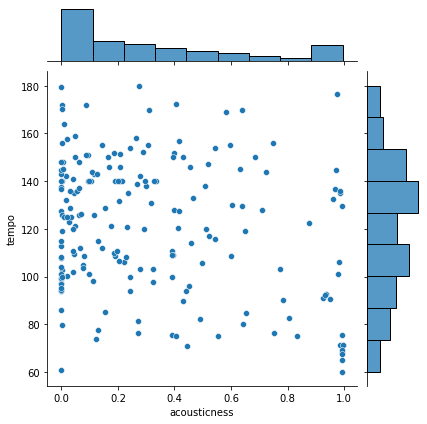

In [20]:
sns.jointplot(x = 'acousticness', y = 'tempo', data = new_MusRec, palette = 'viridis')

<AxesSubplot:xlabel='time_signature', ylabel='instrumentalness'>

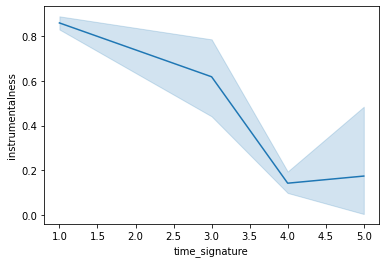

In [21]:
sns.lineplot(x = 'time_signature', y = 'instrumentalness', data = new_MusRec)

## Logistic Regression

### Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
new_MusRec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   loudness          195 non-null    float64
 3   speechiness       195 non-null    float64
 4   acousticness      195 non-null    float64
 5   instrumentalness  195 non-null    float64
 6   valence           195 non-null    float64
 7   tempo             195 non-null    float64
 8   duration_ms       195 non-null    int64  
 9   time_signature    195 non-null    int64  
 10  liked             195 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 16.9 KB


In [27]:
X = new_MusRec.drop('liked', axis = 1)
Y = new_MusRec['liked']

In [28]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature
0,0.803,0.6240,-6.764,0.0477,0.4510,0.000734,0.6280,95.968,304524,4
1,0.762,0.7030,-7.951,0.3060,0.2060,0.000000,0.5190,151.329,247178,4
2,0.261,0.0149,-27.528,0.0419,0.9920,0.897000,0.0382,75.296,286987,4
3,0.722,0.7360,-6.994,0.0585,0.4310,0.000001,0.5820,89.860,208920,4
4,0.787,0.5720,-7.516,0.2220,0.1450,0.000000,0.6470,155.117,179413,4
...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,-19.494,0.0520,0.9760,0.635000,0.1430,176.616,206520,3
191,0.862,0.6240,-11.630,0.0565,0.0192,0.000153,0.8820,124.896,254240,4
192,0.499,0.3510,-11.509,0.0448,0.9510,0.000099,0.6160,90.664,235947,4
193,0.574,0.7290,-5.838,0.0965,0.0406,0.000004,0.4130,110.547,190239,5


In [29]:
Y

0      0
1      1
2      0
3      1
4      1
      ..
190    0
191    0
192    0
193    1
194    1
Name: liked, Length: 195, dtype: int64

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 36)

### Model Implementation

In [31]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [32]:
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [33]:
Predictions = logmodel.predict(X_test)

### Evaluations

<AxesSubplot:xlabel='liked'>

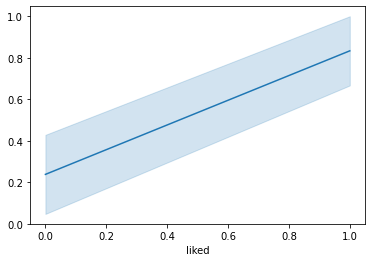

In [34]:
sns.lineplot(x = Y_test, y = Predictions)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print("\t\t\tEvaluation\n\nClassification Report\n")
print(classification_report(Y_test,Predictions))
print("\nConfusion Matrix\n")
print(confusion_matrix(Y_test,Predictions))

			Evaluation

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.75      0.83      0.79        18

    accuracy                           0.79        39
   macro avg       0.80      0.80      0.79        39
weighted avg       0.80      0.79      0.80        39


Confusion Matrix

[[16  5]
 [ 3 15]]
